In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from utils import normal_distance_eval

data = pd.read_csv("sample.csv") 
data['robot_z'] = (data['left_gps_z'] + data['right_gps_z']) / 2
data['robot_x'] = (data['left_gps_x'] + data['left_gps_x']) / 2

In [6]:
data.head()

,time,d_l,d_r,llen,rlen,left_gps_x,left_gps_y,left_gps_z,right_gps_x,right_gps_y,right_gps_z,subject_x,subject_y,subject_z,v_r,v_l,robot_z,robot_x
0,64,0.000000,0.000000,0.508928,0.508928,0.094999,0.079909,0.000017,-0.095001,0.079906,0.000017,0.000000,0.06,0.5000,0.000000,0.000000,0.000017,0.094999
1,128,0.002052,0.004290,0.510980,0.513218,0.094999,0.079879,0.000024,-0.095001,0.079877,0.000024,0.006032,0.06,0.5032,0.023692,0.068448,0.000024,0.094999
2,192,0.004142,0.008565,0.513070,0.517493,0.095000,0.079868,0.000077,-0.095000,0.079867,0.000103,0.012064,0.06,0.5064,0.049581,0.138028,0.000090,0.095000
3,256,0.006251,0.012777,0.515179,0.521705,0.095000,0.079864,0.000194,-0.095000,0.079863,0.000301,0.018095,0.06,0.5096,0.075947,0.206465,0.000247,0.095000
4,320,0.008373,0.016924,0.517301,0.525852,0.095000,0.079862,0.000377,-0.095000,0.079861,0.000619,0.024126,0.06,0.5128,0.102717,0.273733,0.000498,0.095000


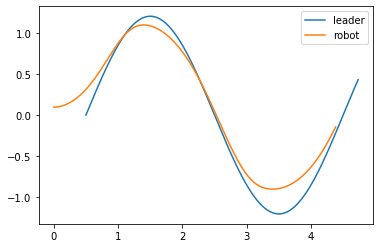

In [7]:
plt.plot(data['subject_z'], data['subject_x'], label='leader')
plt.plot(data['robot_z'], data['robot_x'], label='robot')
plt.legend()
plt.show()

In [8]:
rz = np.array(data['robot_z'])
rx = np.array(data['robot_x'])
robot_coords = np.array(list(zip(rz, rx)))

lz = np.array(data['subject_z'])
lx = np.array(data['subject_x'])
leader_coords = np.array(list(zip(lz, lx)))

In [9]:
leader_path_cum_length = [0]

for i in range(1, len(leader_coords)):
    dist = np.linalg.norm(leader_coords[i] - leader_coords[i-1])
    leader_path_cum_length.append(leader_path_cum_length[i-1] + dist)
    
robot_dist_to_leader_path, distance_score = normal_distance_eval(robot_coords, leader_coords)

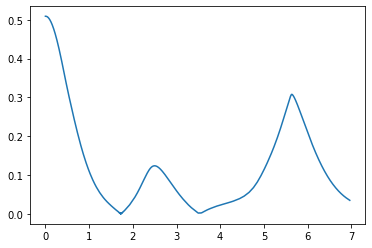

In [10]:
plt.plot(leader_path_cum_length, robot_dist_to_leader_path)
plt.show()

In [11]:
print('Total distance to leader:', distance_score)

Total distance to leader: 148.26959494643148


# Lemniscates

Generate the trajectory for the leader mathematically using lemniscates

In [12]:
%matplotlib notebook

def plot_lemniscate_animated(ts, xs, ys, xlim = (-1, 1), ylim=(-1, 1)):
    fig,ax = plt.subplots(1,1)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    line, = ax.plot([], [])
    for i in range(len(ts) + 1):
        line.set_xdata(xs[0:i])
        line.set_ydata(ys[0:i])
        fig.canvas.draw()
        
    plt.show()

## Gerono Lemniscate

Generate the values of t ordered in the way that we want the leader to move

In [13]:
def generate_gerono_lemniscate_t(coords_len):
    p1 = np.arange(0, np.pi + 0.000001, (np.pi)/(coords_len/2))
    p2 = np.arange(-np.pi - 0.000001, 0, (np.pi)/(coords_len/2))
#     print(p1)
#     print(p2)
    return np.concatenate((p1, p2))

<IPython.core.display.Javascript object>


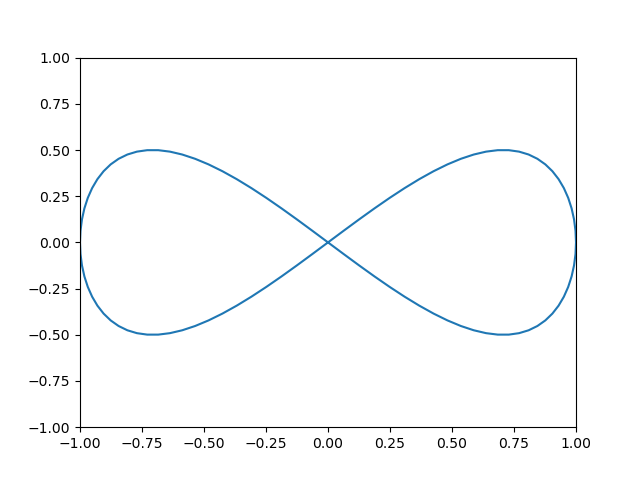

In [15]:
%matplotlib notebook

A = 1
ts = np.array(generate_gerono_lemniscate_t(100))
xs = np.array([A * np.sin(t) for t in ts])
ys = np.array([A * np.sin(t) * np.cos(t) for t in ts])

plot_lemniscate_animated(ts, xs, ys)

## Bernoulli Lemniscate

Generate the values of t ordered in the way that we want the leader to move

In [16]:
def generate_bernoulli_lemniscate_t(coords_len):
    p1 = np.arange(np.pi/2, 0, -(np.pi)/(coords_len/2))
    p2 = np.arange(0, -np.pi, -(np.pi)/(coords_len/2))
    p3 = np.arange(np.pi, np.pi/2 - 0.0001, -(np.pi)/(coords_len/2))
    return np.concatenate((p1, p2, p3))

<IPython.core.display.Javascript object>


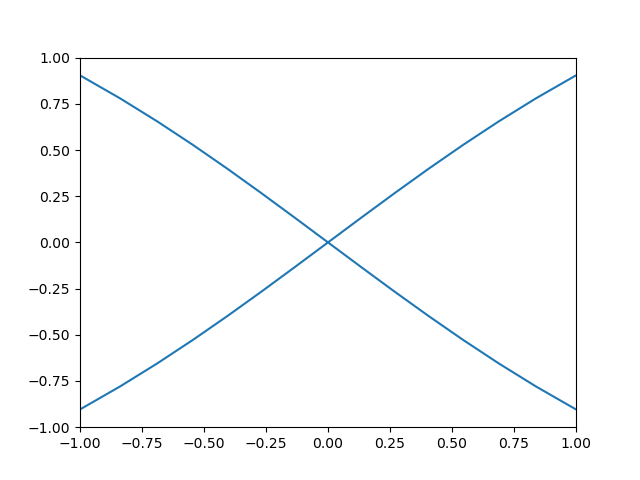

In [17]:
A = 3
ts = np.array(generate_bernoulli_lemniscate_t(100))
xs = np.array([(A * np.sqrt(2) * np.cos(t))/(np.sin(t)**2 + 1) for t in ts])
ys = np.array([(A * np.sqrt(2) * np.cos(t) * np.sin(t)/(np.sin(t)**2 + 1)) for t in ts])

plot_lemniscate_animated(ts, xs, ys)